In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set path for file
csvpath = os.path.join("loan.csv")
print(csvpath)

x_axis = np.arange(0, 100, 1)

loan.csv


In [2]:
loans_df = pd.read_csv(csvpath)
loans_df.head()

C:\Users\Chong\.conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pertinent_loans_df = loans_df[[ "dti","annual_inc", "loan_amnt", "term", "int_rate", "total_pymnt", "issue_d", "addr_state", "zip_code", "purpose"]]
pertinent_loans_df

,dti,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,purpose
0,18.24,55000.0,2500,36 months,13.56,167.020000,Dec-2018,NY,109xx,debt_consolidation
1,26.52,90000.0,30000,60 months,18.94,1507.110000,Dec-2018,LA,713xx,debt_consolidation
2,10.51,59280.0,5000,36 months,17.97,353.890000,Dec-2018,MI,490xx,debt_consolidation
3,16.74,92000.0,4000,36 months,18.94,286.710000,Dec-2018,WA,985xx,debt_consolidation
4,26.35,57250.0,30000,60 months,16.14,1423.210000,Dec-2018,MD,212xx,debt_consolidation
...,...,...,...,...,...,...,...,...,...,...
2260663,20.88,58000.0,12000,60 months,14.08,5360.960000,Oct-2017,VT,054xx,debt_consolidation
2260664,19.28,30000.0,12000,60 months,25.82,14499.802172,Oct-2017,OR,971xx,debt_consolidation
2260665,12.96,64000.0,10000,36 months,11.99,5306.940000,Oct-2017,IL,603xx,debt_consolidation
2260666,30.82,60000.0,12000,60 months,21.45,5207.290000,Oct-2017,AK,996xx,debt_consolidation


In [4]:
pertinent_loans_df["annual_inc"].max()

110000000.0

In [5]:
pertinent_loans_df["dti"].min()

-1.0

In [6]:
# Create the bins in which annual_inc will be held, based on tax brackets
bins = [0, 9700, 39475, 84200, 160725, 204100, 510300, 110000000]


# Create the names for the four bins
income_tiers = ["Tier_One", "Tier_Two", "Tier_Three", "Tier_Four", "Tier_Five", "Tier_Six", "Tier_Seven"]

In [7]:
a = pd.cut(pertinent_loans_df["annual_inc"], bins, labels=income_tiers)
a.head()

0    Tier_Three
1     Tier_Four
2    Tier_Three
3     Tier_Four
4    Tier_Three
Name: annual_inc, dtype: category
Categories (7, object): [Tier_One < Tier_Two < Tier_Three < Tier_Four < Tier_Five < Tier_Six < Tier_Seven]

In [8]:
pertinent_loans_df["tier_group"] = a
pertinent_loans_df.head()

C:\Users\Chong\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,purpose,tier_group
0,18.24,55000.0,2500,36 months,13.56,167.02,Dec-2018,NY,109xx,debt_consolidation,Tier_Three
1,26.52,90000.0,30000,60 months,18.94,1507.11,Dec-2018,LA,713xx,debt_consolidation,Tier_Four
2,10.51,59280.0,5000,36 months,17.97,353.89,Dec-2018,MI,490xx,debt_consolidation,Tier_Three
3,16.74,92000.0,4000,36 months,18.94,286.71,Dec-2018,WA,985xx,debt_consolidation,Tier_Four
4,26.35,57250.0,30000,60 months,16.14,1423.21,Dec-2018,MD,212xx,debt_consolidation,Tier_Three


In [9]:
# Create a GroupBy object based upon "View Group"
loan_group = pertinent_loans_df.groupby("tier_group")

# Find how many rows fall into each bin
print(loan_group["annual_inc"].count())

# Get the average of each column within the GroupBy object
loan_group[["int_rate", "loan_amnt", "annual_inc"]].mean()

tier_group
Tier_One         2954
Tier_Two       343095
Tier_Three    1196274
Tier_Four      604591
Tier_Five       59806
Tier_Six        48894
Tier_Seven       3383
Name: annual_inc, dtype: int64


,int_rate,loan_amnt,annual_inc
tier_group,,,
Tier_One,14.813074,11096.267773,6.529720e+03
Tier_Two,13.962959,8677.464842,2.989422e+04
Tier_Three,13.252005,13711.771613,5.970080e+04
Tier_Four,12.506046,19535.365230,1.101832e+05
Tier_Five,11.945691,23553.136809,1.814288e+05
Tier_Six,11.709249,25823.841371,2.769104e+05
Tier_Seven,11.682722,26295.876441,1.068499e+06


In [10]:
tier_group_x = [0, 9700, 39475, 84200, 160725, 204100, 510300, 110000000]



In [11]:
pertinent_loans_df.head()

,dti,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,purpose,tier_group
0,18.24,55000.0,2500,36 months,13.56,167.02,Dec-2018,NY,109xx,debt_consolidation,Tier_Three
1,26.52,90000.0,30000,60 months,18.94,1507.11,Dec-2018,LA,713xx,debt_consolidation,Tier_Four
2,10.51,59280.0,5000,36 months,17.97,353.89,Dec-2018,MI,490xx,debt_consolidation,Tier_Three
3,16.74,92000.0,4000,36 months,18.94,286.71,Dec-2018,WA,985xx,debt_consolidation,Tier_Four
4,26.35,57250.0,30000,60 months,16.14,1423.21,Dec-2018,MD,212xx,debt_consolidation,Tier_Three


In [12]:
loan_group2 = pertinent_loans_df.groupby("purpose")
#print(loan_group2["purpose"].count())
purposeList = list(loan_group2["purpose"].count())
print(purposeList)


[24013, 516971, 1277877, 424, 150457, 14136, 50445, 27488, 15403, 139440, 1445, 24689, 15525, 2355]


In [13]:
purpose_png = (loan_group2["purpose"].count())
purpose_png_sort = purpose_png.sort_values(ascending=False)

print(purpose_png_sort)

purpose
debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64


In [15]:
purposeType = pertinent_loans_df["purpose"].unique()
purposeTypeList = list(purposeType)
purposeTypeList

['debt_consolidation',
 'credit_card',
 'house',
 'car',
 'other',
 'vacation',
 'home_improvement',
 'small_business',
 'major_purchase',
 'medical',
 'renewable_energy',
 'moving',
 'wedding',
 'educational']

In [16]:
#loan = ["car", "credit card", "debt_consolidation", "educational", "home_improvement", "house", "major_purchase", "medical", "moving", "other", "renewable_energy", "small_business", "vacation", "wedding" ]

#sizes = [24013, 516971, 1277877, 424, 150457, 14136, 50445, 27488, 15403, 139440, 1445, 24689, 15525, 2355 ]

colors = ["red", "sienna", "moccasin", "gold", "darkkhaki", "darkgreen", "lightseagreen", "green", "blue", "mediumpurple", "plum", "gray", "orange", "brown"]

explode = (0, 0.1, 0.1, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)


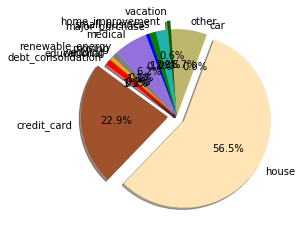

In [18]:
plt.pie(purposeList, explode=explode, labels=purposeTypeList, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("loan_piechart02.png")

In [19]:
loan = [ "Credit card", "Debt Consolidation", "Home improvement", "Other", "Personal\Misc"]

sizes = [ 516971, 1277877, 150457, 139440, 174508 ]

colors = ["red", "sienna", "moccasin", "gold", "green"]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)


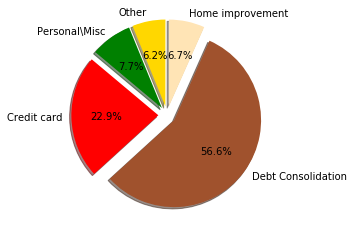

In [20]:
plt.pie(sizes, explode=explode, labels=loan, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("loan_piechart01.png")

In [21]:
loan_group3 = pertinent_loans_df.groupby("purpose").mean()[["loan_amnt"]]
loan_group3



,loan_amnt
purpose,
car,9393.720068
credit_card,15319.730362
debt_consolidation,15966.695954
educational,6614.622642
home_improvement,14666.147969
house,15703.917303
major_purchase,12682.430370
medical,9474.190556
moving,8390.811855


100 loans from each tier 

In [ ]:
##df.iloc[np.random.randint(1,1000), :]

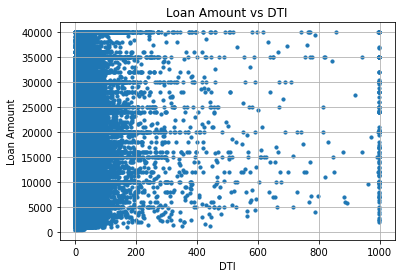

In [22]:
plt.scatter(pertinent_loans_df["dti"], pertinent_loans_df["loan_amnt"], marker="o", s=10,)

plt.title("Loan Amount vs DTI")
plt.xlabel("DTI")
plt.ylabel("Loan Amount")
plt.grid(True)

plt.savefig("Loan Amount vs DTI")
plt.show()


In [23]:
pertinent_loans_df["dti"].describe()

count    2.258957e+06
mean     1.882420e+01
std      1.418333e+01
min     -1.000000e+00
25%      1.189000e+01
50%      1.784000e+01
75%      2.449000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [24]:
pertinent_loans_df["dti"].min()

-1.0

In [25]:
pertinent_loans_df["dti"].max()

999.0